In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
churn = pd.read_csv('Churn_Modelling.csv')
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
churn.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [4]:
churn.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1,inplace=True)

In [5]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
churn.Gender = label_encoder.fit_transform(churn.Gender)
churn

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [6]:
churn.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [7]:
X = churn.drop(['Exited'],axis=1)
y = churn[['Exited']]

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [9]:
X_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
190,715,France,0,41,8,56214.85,2,0,0,92982.61
25,577,France,1,25,3,0.00,2,0,1,124508.29
1920,591,France,0,31,7,0.00,2,0,1,48778.46
6536,625,France,0,37,7,115895.42,1,1,0,48486.25
4833,762,France,1,32,10,191775.65,1,1,0,179657.83
...,...,...,...,...,...,...,...,...,...,...
7875,697,France,0,38,1,182065.85,1,1,0,49503.50
518,698,France,1,48,4,101238.24,2,0,1,177815.87
3812,625,France,0,40,7,141267.67,1,0,1,177397.49
3408,832,Germany,0,40,9,107648.94,2,1,1,134638.97


In [10]:
from category_encoders import TargetEncoder
te = TargetEncoder(cols=['Geography'])
#Tranformer les datasets
training_data = te.fit_transform(X_train,y_train)
test_data = te.transform(X_test)

In [11]:
training_data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
190,715,0.164116,0,41,8,56214.85,2,0,0,92982.61
25,577,0.164116,1,25,3,0.00,2,0,1,124508.29
1920,591,0.164116,0,31,7,0.00,2,0,1,48778.46
6536,625,0.164116,0,37,7,115895.42,1,1,0,48486.25
4833,762,0.164116,1,32,10,191775.65,1,1,0,179657.83
...,...,...,...,...,...,...,...,...,...,...
7875,697,0.164116,0,38,1,182065.85,1,1,0,49503.50
518,698,0.164116,1,48,4,101238.24,2,0,1,177815.87
3812,625,0.164116,0,40,7,141267.67,1,0,1,177397.49
3408,832,0.326475,0,40,9,107648.94,2,1,1,134638.97


In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
training_data_sc = sc.fit_transform(training_data)
testing_data = sc.transform(test_data)


In [13]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [14]:
classifier = Sequential()
classifier.add(Dense(units=6,kernel_initializer='uniform',activation='relu',
                     input_dim=X_train.shape[1]))
classifier.add(Dense(units=6,kernel_initializer='uniform',activation='relu'))
classifier.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))

c:\Users\ffoue\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',
                   metrics=['accuracy'])

In [20]:
model = classifier.fit(training_data_sc,y_train,batch_size=16,epochs=20,
                       validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7905 - loss: 0.6097 - val_accuracy: 0.8040 - val_loss: 0.4305
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - accuracy: 0.7941 - loss: 0.4357 - val_accuracy: 0.8040 - val_loss: 0.4239
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - accuracy: 0.7854 - loss: 0.4380 - val_accuracy: 0.8040 - val_loss: 0.4200
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - accuracy: 0.7898 - loss: 0.4177 - val_accuracy: 0.8040 - val_loss: 0.4171
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - accuracy: 0.8104 - loss: 0.4066 - val_accuracy: 0.8320 - val_loss: 0.4164
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - accuracy: 0.8243 - loss: 0.4174 - val_accuracy: 0.8333 - val_loss: 0.4117
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - accuracy: 0.8203 - loss: 0.4156 - val_accuracy: 0.8340 - val_loss: 0.4108
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - accuracy: 0.8218 - loss: 0.4211 - va

In [21]:
model.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

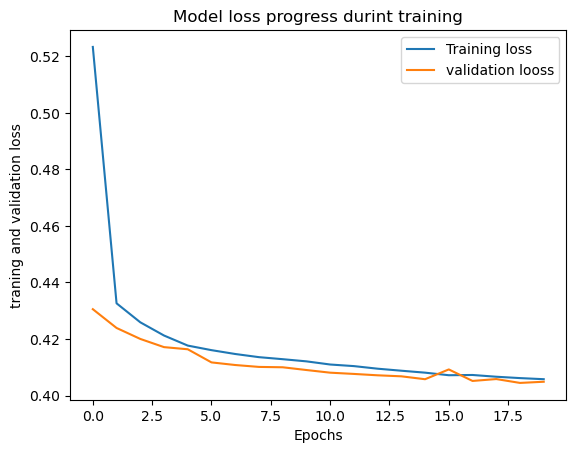

In [22]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('Model loss progress durint training')
plt.xlabel('Epochs')
plt.ylabel('traning and validation loss')
plt.legend(['Training loss', 'validation looss'])

In [23]:
y_predict = classifier.predict(testing_data)
y_predict = (y_predict>0.5)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step


<AxesSubplot:>

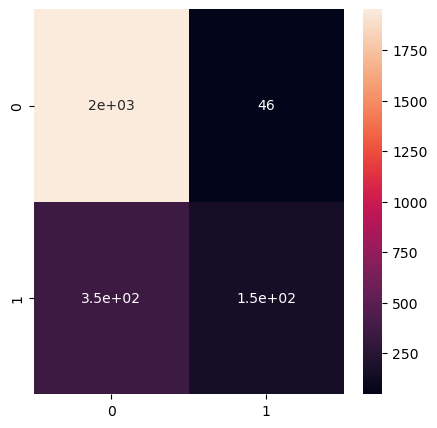

In [25]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
f,ax=plt.subplots(figsize = (5,5))
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1998
           1       0.77      0.31      0.44       502

    accuracy                           0.84      2500
   macro avg       0.81      0.64      0.67      2500
weighted avg       0.83      0.84      0.81      2500

